# Crop & Fertilizer Recommendation System Using ML

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Loading the datasets

In [2]:
crop_data = pd.read_csv('data/Crop_recommendation.csv')
fertilizer_data = pd.read_csv('data/Fertilizer Prediction.csv')

# Displaying the first few rows of the datasets

In [4]:
print("Crop Recommendation Dataset:")
crop_data.head()

Crop Recommendation Dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
print("\nFertilizer Recommendation Dataset:")
fertilizer_data.head()


Fertilizer Recommendation Dataset:


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


# Exploratory Data Analysis (EDA)

In [7]:
print("\nDataset Information:")
print(crop_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [8]:
print("\nFertilizer Dataset Information:")
print(fertilizer_data.info())


Fertilizer Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB
None


# Checking for missing values

In [9]:
print("\nMissing Values in Crop Data:")
print(crop_data.isnull().sum())


Missing Values in Crop Data:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [10]:
print("\nMissing Values in Fertilizer Data:")
print(fertilizer_data.isnull().sum())


Missing Values in Fertilizer Data:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


# Statistical summary of the datasets

In [12]:
print("\nStatistical Summary of Crop Data:")
crop_data.describe()


Statistical Summary of Crop Data:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
print("\nStatistical Summary of Fertilizer Data:")
fertilizer_data.describe()


Statistical Summary of Fertilizer Data:


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


# Visualizing the correlation heatmap

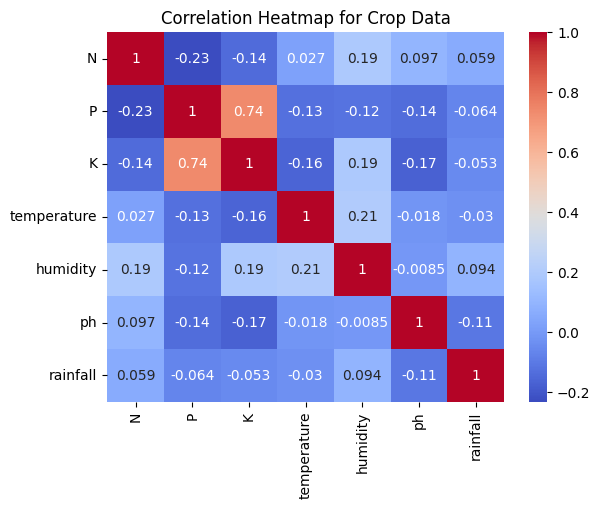

In [15]:
# Exclude non-numerical columns for correlation calculation
numerical_data = crop_data.select_dtypes(include=['float64', 'int64'])


sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Crop Data')
plt.show()


# Preprocessing and Feature Selection

In [16]:
X_crop = crop_data.drop('label', axis=1)  # Features for crop prediction
y_crop = crop_data['label']             # Target for crop prediction

# Splitting data for crop recommendation

In [17]:
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(
    X_crop, y_crop, test_size=0.2, random_state=42
)


# Model Training for Crop Recommendation

In [18]:
crop_model = RandomForestClassifier(random_state=42)
crop_model.fit(X_train_crop, y_train_crop)

RandomForestClassifier(random_state=42)

# Evaluating the crop recommendation model

In [21]:
y_pred_crop = crop_model.predict(X_test_crop)
print("\nCrop Recommendation Model Accuracy:", accuracy_score(y_test_crop, y_pred_crop))
print("\nClassification Report for Crop Recommendation:")
print(classification_report(y_test_crop, y_pred_crop))# Saving the crop recommendation model


Crop Recommendation Model Accuracy: 0.9931818181818182

Classification Report for Crop Recommendation:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.

# Saving the crop recommendation model

In [22]:
with open('crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(crop_model, f)

# Preprocessing Fertilizer Data

In [26]:
# Renaming columns to remove whitespace and standardize formatting
fertilizer_data.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Preprocessing: convert specific columns to lowercase
fertilizer_data['crop type'] = fertilizer_data['crop type'].str.lower()
fertilizer_data['soil type'] = fertilizer_data['soil type'].str.lower()


In [28]:
# Encoding categorical columns
fertilizer_data = pd.get_dummies(fertilizer_data, columns=['crop type', 'soil type'], drop_first=True)

# Splitting features and target for fertilizer prediction

In [31]:
X_fertilizer = fertilizer_data.drop('fertilizer name', axis=1)
y_fertilizer = fertilizer_data['fertilizer name']

In [32]:
# Splitting data for fertilizer recommendation
X_train_fertilizer, X_test_fertilizer, y_train_fertilizer, y_test_fertilizer = train_test_split(
    X_fertilizer, y_fertilizer, test_size=0.2, random_state=42
)

# Model Training for Fertilizer Recommendation

In [33]:
fertilizer_model = RandomForestClassifier(random_state=42)
fertilizer_model.fit(X_train_fertilizer, y_train_fertilizer)

RandomForestClassifier(random_state=42)

# Evaluating the fertilizer recommendation model

In [34]:
y_pred_fertilizer = fertilizer_model.predict(X_test_fertilizer)
print("\nFertilizer Recommendation Model Accuracy:", accuracy_score(y_test_fertilizer, y_pred_fertilizer))
print("\nClassification Report for Fertilizer Recommendation:")
print(classification_report(y_test_fertilizer, y_pred_fertilizer))


Fertilizer Recommendation Model Accuracy: 1.0

Classification Report for Fertilizer Recommendation:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Saving the fertilizer recommendation model

In [35]:

with open('fertilizer_recommendation_model.pkl', 'wb') as f:
    pickle.dump(fertilizer_model, f)

 # Sample Recommendation Function

In [36]:

def recommend(crop_features, soil_features):
    """
    Recommends a crop and a fertilizer based on input features.
    
    Parameters:
        crop_features (list): Features for crop recommendation [N, P, K, temperature, humidity, ph, rainfall].
        soil_features (dict): Features for fertilizer recommendation {"Crop": ..., "Soil Type": ..., ...}.
    
    Returns:
        dict: Recommended crop and fertilizer.
    """
    # Load models
    with open('crop_recommendation_model.pkl', 'rb') as f:
        crop_model = pickle.load(f)

    with open('fertilizer_recommendation_model.pkl', 'rb') as f:
        fertilizer_model = pickle.load(f)

    # Predict crop
    crop = crop_model.predict([crop_features])[0]

    # Prepare soil features for fertilizer prediction
    soil_df = pd.DataFrame([soil_features])
    soil_df = pd.get_dummies(soil_df, columns=['Crop', 'Soil Type'], drop_first=True)

    # Align columns to match the training data
    soil_df = soil_df.reindex(columns=X_fertilizer.columns, fill_value=0)

    # Predict fertilizer
    fertilizer = fertilizer_model.predict(soil_df)[0]

    return {
        'Recommended Crop': crop,
        'Recommended Fertilizer': fertilizer
    }

# Example usage of the recommendation function

In [39]:

sample_crop_features = [90, 42, 43, 20.87, 82.002, 6.502, 202.935]
sample_soil_features = {"Crop": "rice", "Soil Type": "sandy", "moisture": 22}


In [40]:
recommendation = recommend(sample_crop_features, sample_soil_features)
print("\nSample Recommendation:")
print(recommendation)


Sample Recommendation:
{'Recommended Crop': 'rice', 'Recommended Fertilizer': '20-20'}


C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
